划分数据集 8:2划分为训练集和测试集

In [1]:
# import numpy as np
# import pandas as pd
# # 读取文本文件，假设每行是一个样本
# with open('abalone.data', 'r') as file:
#     data = file.readlines()
# 
# # 设置随机种子以确保可重复性
# np.random.seed(42)
# 
# # 随机打乱数据索引
# indices = np.arange(len(data))
# np.random.shuffle(indices)
# 
# # 计算分割点
# split_point = int(0.8 * len(data))  # 70% 训练集
# 
# # 分割数据为训练集和测试集
# train_data = [data[i] for i in indices[:split_point]]
# test_data = [data[i] for i in indices[split_point:]]
# 
# # 保存训练集和测试集
# with open('abalone_train.txt', 'w') as train_file:
#     train_file.writelines(train_data)
# 
# with open('abalone_test.txt', 'w') as test_file:
#     test_file.writelines(test_data)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def normalize_dataset(dataset):
    """
    对数据集进行归一化处理，将每个特征的值缩放到[0, 1]范围内。
    """
    # 将数据集转换为NumPy数组
    dataset = np.array(dataset)

    # 计算每个特征的最小值和最大值
    min_values = np.min(dataset, axis=0)
    max_values = np.max(dataset, axis=0)

    # 归一化数据集
    normalized_dataset = (dataset - min_values) / (max_values - min_values)

    return normalized_dataset

def loadDataset(fileName):
    #特征数量
    numFeat=len(open(fileName).readline().split(','))-1
    dataMat=[]
    labelMat=[]
    fr=open(fileName)
    for line in fr.readlines():
        linearr=[]
        curLine=line.strip().split(',')
        for i in range(1,numFeat+1):
            linearr.append(float(curLine[i]))
        dataMat.append(linearr)
        labelMat.append(float(curLine[0]))
    return np.array(dataMat),np.array(labelMat)

In [3]:
def lwlr(testpoint,trainSet,label,k=1.0): # 局部加权线性回归
    xMat=np.mat(trainSet)
    yMat=np.mat(label).T
    m=np.shape(xMat)[0]
    weights=np.mat(np.eye(m)) # 创建对角矩阵
    for j in range(m):
        diffMat=testpoint-xMat[j,:]
        weights[j,j]=np.exp(diffMat*diffMat.T/(-2.0*k**2))
    xTx=xMat.T*(weights*xMat)
    if np.linalg.det(xTx)==0.0:
        print("This matrix is singular!")
        return
    ws=xTx.I*(xMat.T*(weights*yMat))
    return testpoint*ws

def lwlrtrain(testArr,trainSet,label,k=1.0):
    m=np.shape(testArr)[0]
    yHat=np.zeros(m)
    mse=0.0 #均方误差
    for i in range(m):
        yHat[i]=lwlr(testArr[i],trainSet,label,k)
        mse += (yHat[i] - label[i]) ** 2
        print(i)
    mse/=m
    print("MSE：",mse)
    return yHat

例如从第一行可以看到鲍鱼的长度length 和鲍鱼直径diameter 、鲍鱼高度height 存在明显的线性关系。鲍鱼长度与鮑鱼的四种重量之间存在明显的非线性关系。
观察最后一行，鲍鱼环数rings 与各个特征均存在正相关性,中与height 的线性关系最为直观。
观察对角线上的直方图，可以看到幼鲍鱼( sex 取值为")在各个特征上的取值明显小于其他成年鲍鱼。而雄性鲍鱼( sex取值为“M")和雌性鲍鱼( sex 取值为“F")各个特征取值分布没有明显的差异。


In [4]:
xtrain,ytrain=loadDataset('abalone_train.txt')
xtest,ytest=loadDataset('abalone_test.txt')

In [5]:
import numpy as np
def matrix_sol(x,y):
    sample_num = x.shape[0]  # 样本数量
    xTx = np.linalg.inv(np.dot(x.T, x))  # (xT*x)^-1
    w1 = np.dot(np.dot(xTx, x.T), y)  #  (xT*x)^-1*xT*y 
    return w1

In [6]:
yHat=lwlrtrain(xtest,xtrain,ytrain,k=0.5)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [7]:
# 标准线性回归（矩阵法）
w1 = matrix_sol(xtrain,ytrain)
w1
y_predict=xtest.dot(w1)


In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
mse = mean_squared_error(ytest, y_predict)
r2=r2_score(ytest,y_predict)
mape=mean_absolute_percentage_error(ytest,y_predict)

In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
mse = mean_squared_error(ytest, yHat)
r2=r2_score(ytest,yHat)
mape=mean_absolute_percentage_error(ytest,yHat)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)
print("MAPE:", mape)

Mean Squared Error: 4.2345546533561835
R2 Score: 0.5094611650144751
MAPE: 0.15594333343025593


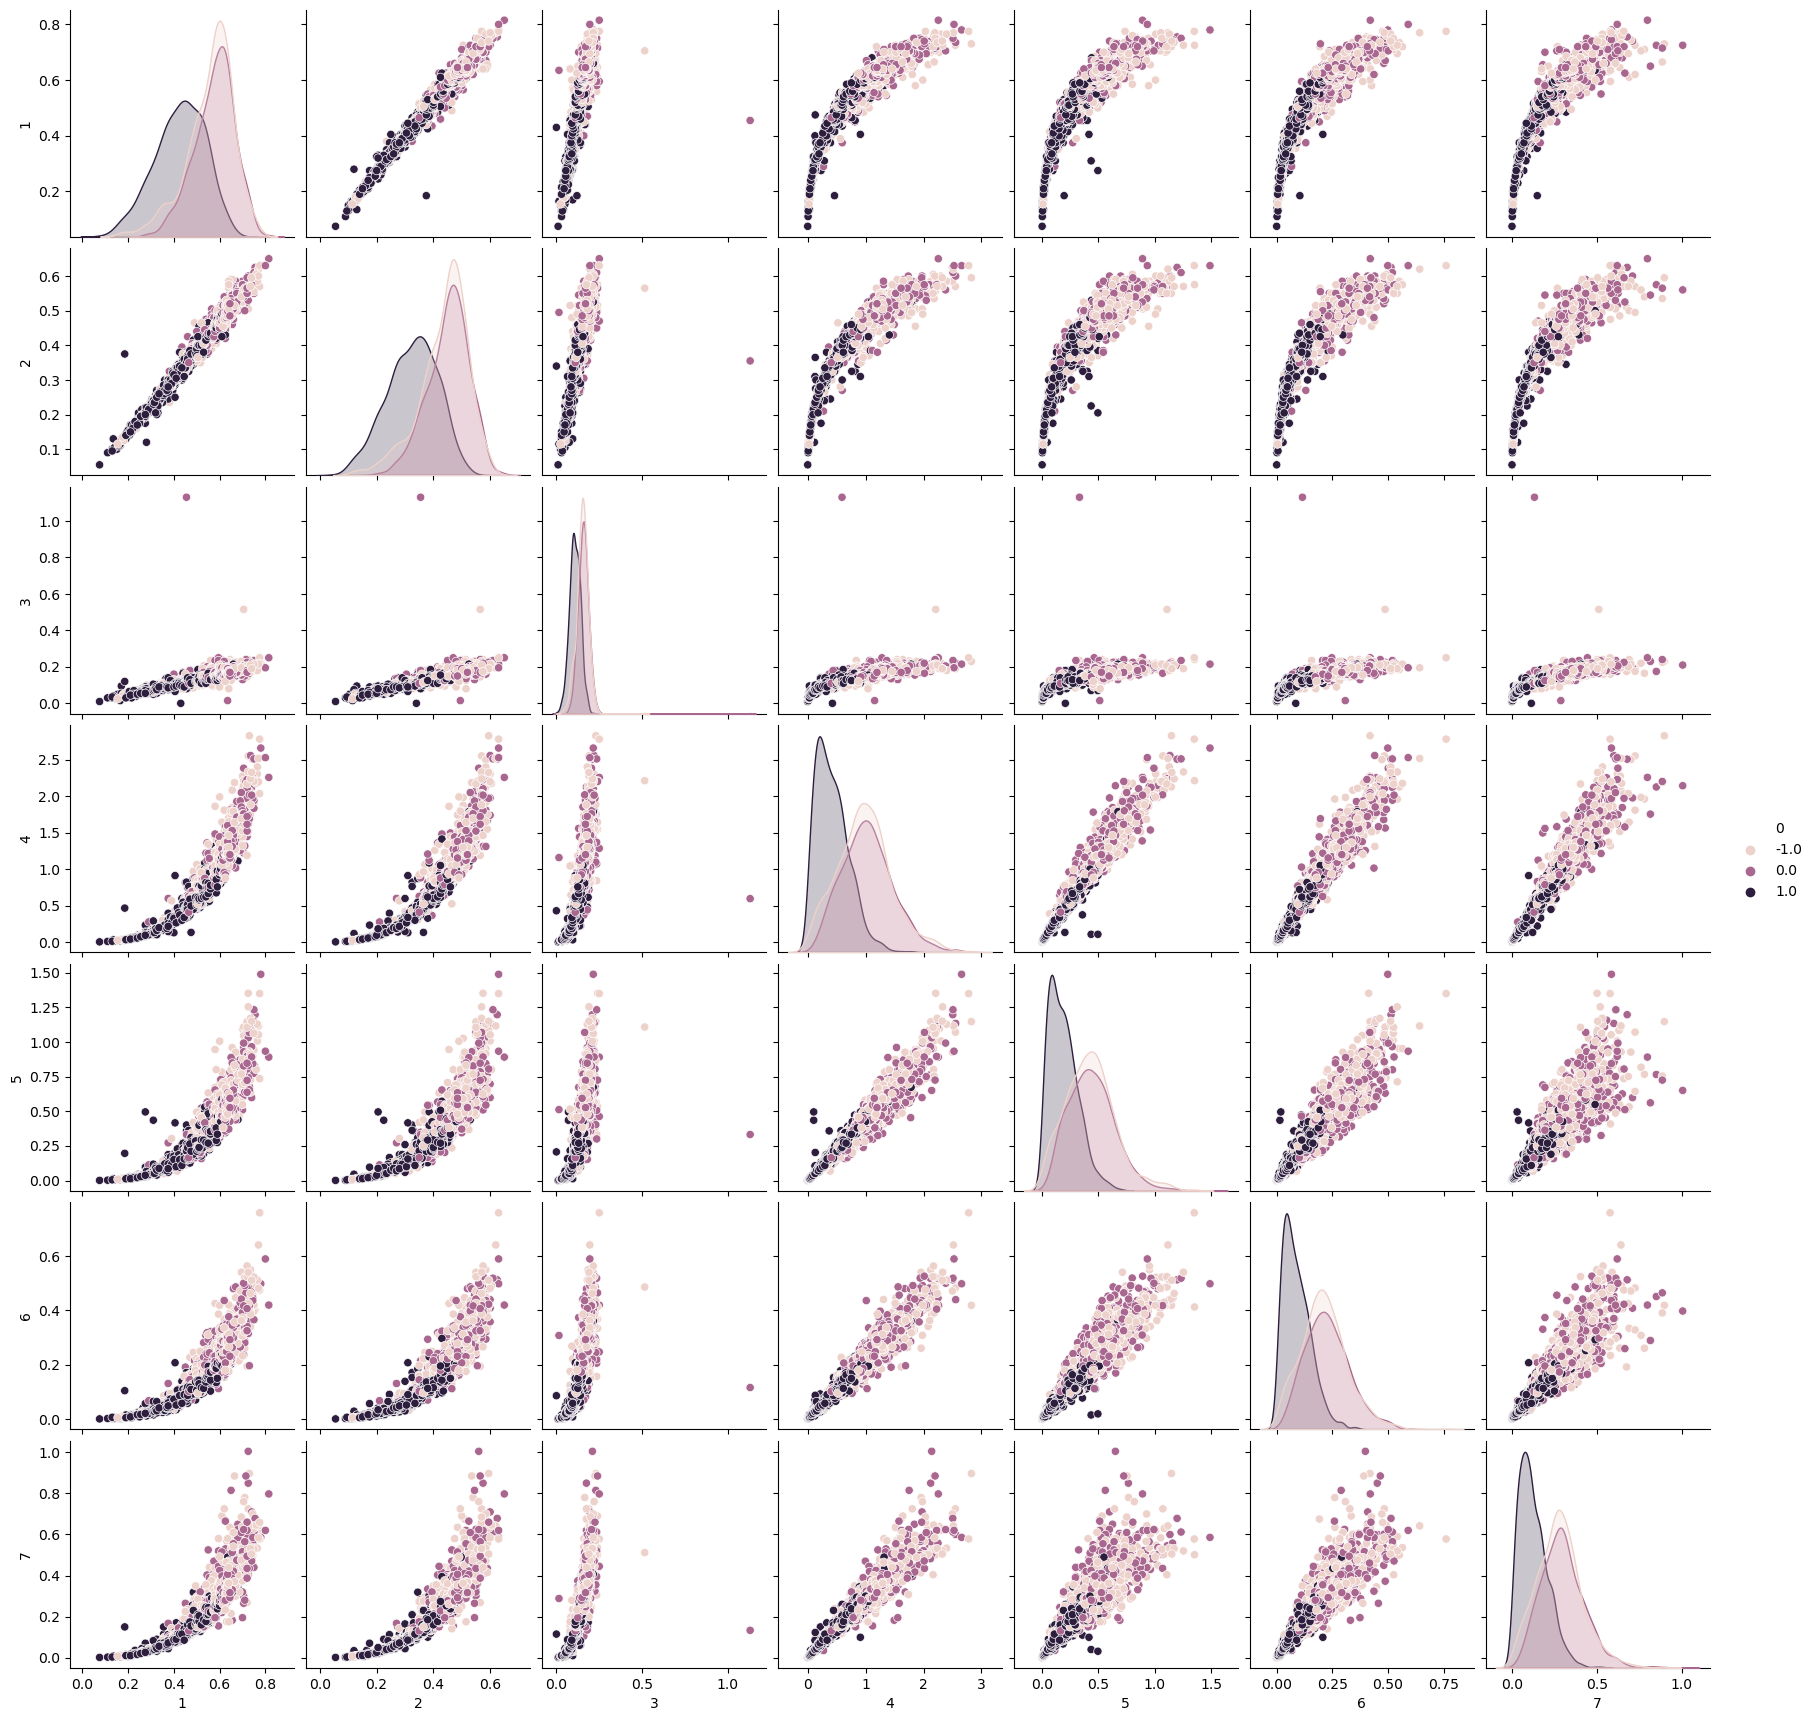

In [10]:
import seaborn as sns
import pandas as pd
x,y=loadDataset('abalone_train.txt')
df=pd.DataFrame(x,y)
sns.pairplot(df,hue=0)

C:\Users\weiliang\AppData\Local\Temp\ipykernel_19624\2461263134.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\weiliang\AppData\Local\Temp\ipykernel_19624\2461263134.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\weiliang\AppData\Local\Temp\ipykernel

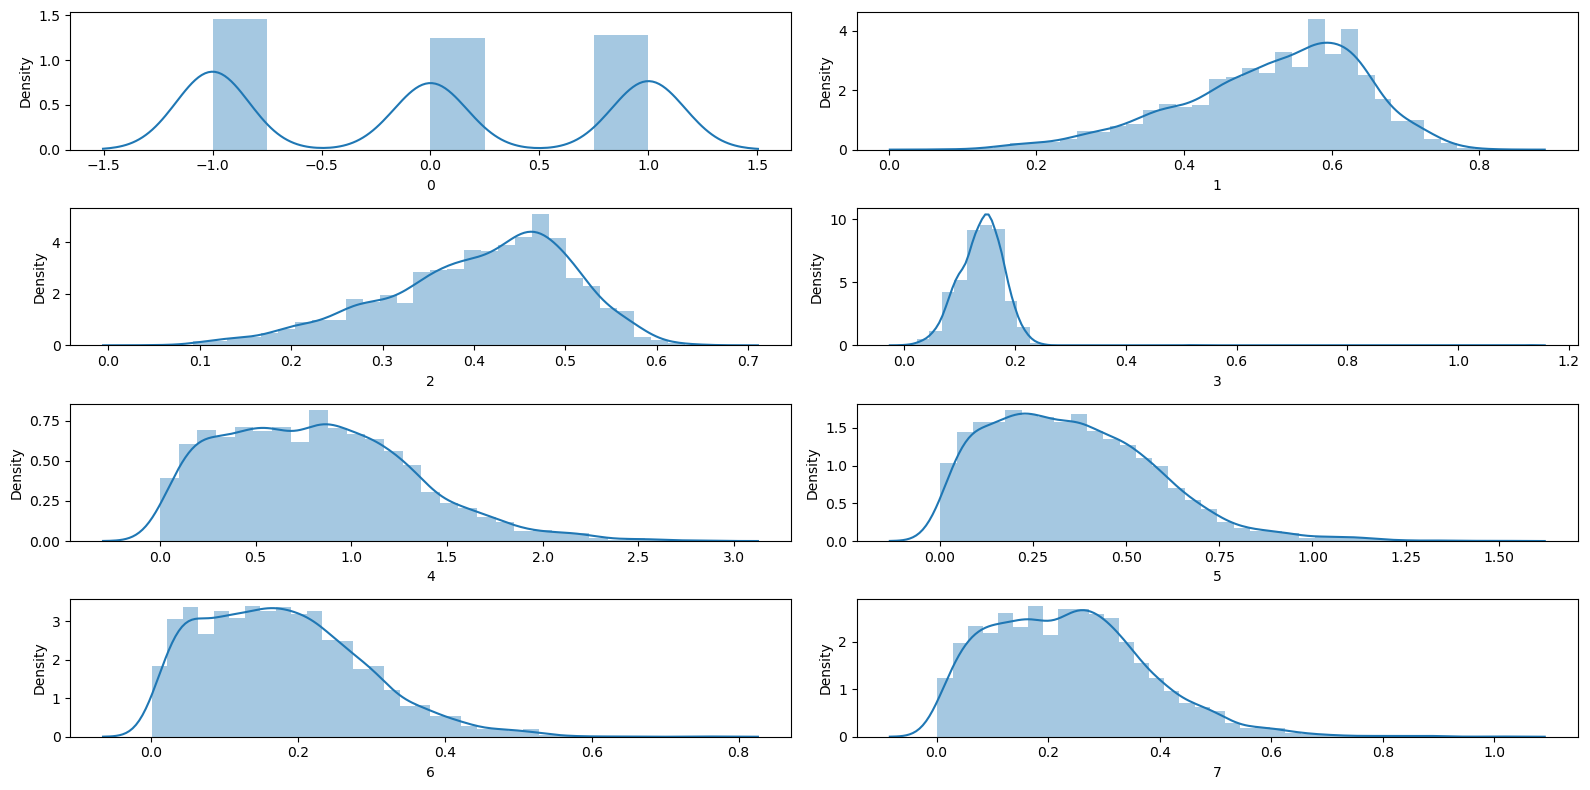

In [11]:
i = 1 #子图计数
plt.figure(figsize=(16,8))
for col in df.columns[0:]:
    plt.subplot(4,2,i)
    i = i + 1
    sns.distplot(df[col])
    plt.tight_layout()

In [12]:
corr_df = df.corr()
corr_df

,0,1,2,3,4,5,6,7
0,1.000000,-0.442262,-0.452362,-0.402761,-0.455188,-0.432160,-0.448579,-0.441742
1,-0.442262,1.000000,0.986916,0.802324,0.923697,0.896363,0.902365,0.894485
2,-0.452362,0.986916,1.000000,0.809813,0.925382,0.892394,0.900968,0.903924
3,-0.402761,0.802324,0.809813,1.000000,0.793731,0.750080,0.772801,0.792823
4,-0.455188,0.923697,0.925382,0.793731,1.000000,0.969228,0.966729,0.955623
5,-0.432160,0.896363,0.892394,0.750080,0.969228,1.000000,0.933557,0.880780
6,-0.448579,0.902365,0.900968,0.772801,0.966729,0.933557,1.000000,0.906514
7,-0.441742,0.894485,0.903924,0.792823,0.955623,0.880780,0.906514,1.000000


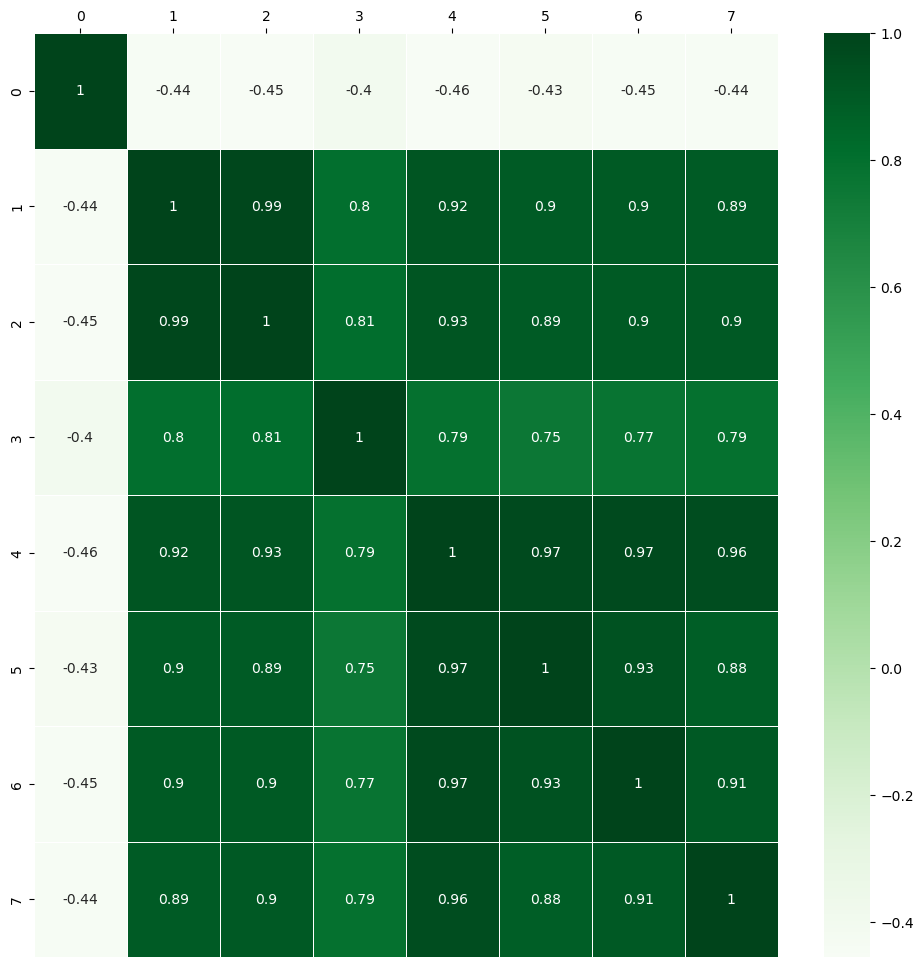

In [13]:
fig,ax = plt.subplots(figsize=(12,12))
#绘制热力图
ax = sns.heatmap(corr_df,linewidths=.5,
                 cmap="Greens",
                 annot=True,
                 xticklabels=corr_df.columns,
                 yticklabels=corr_df.index)
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()


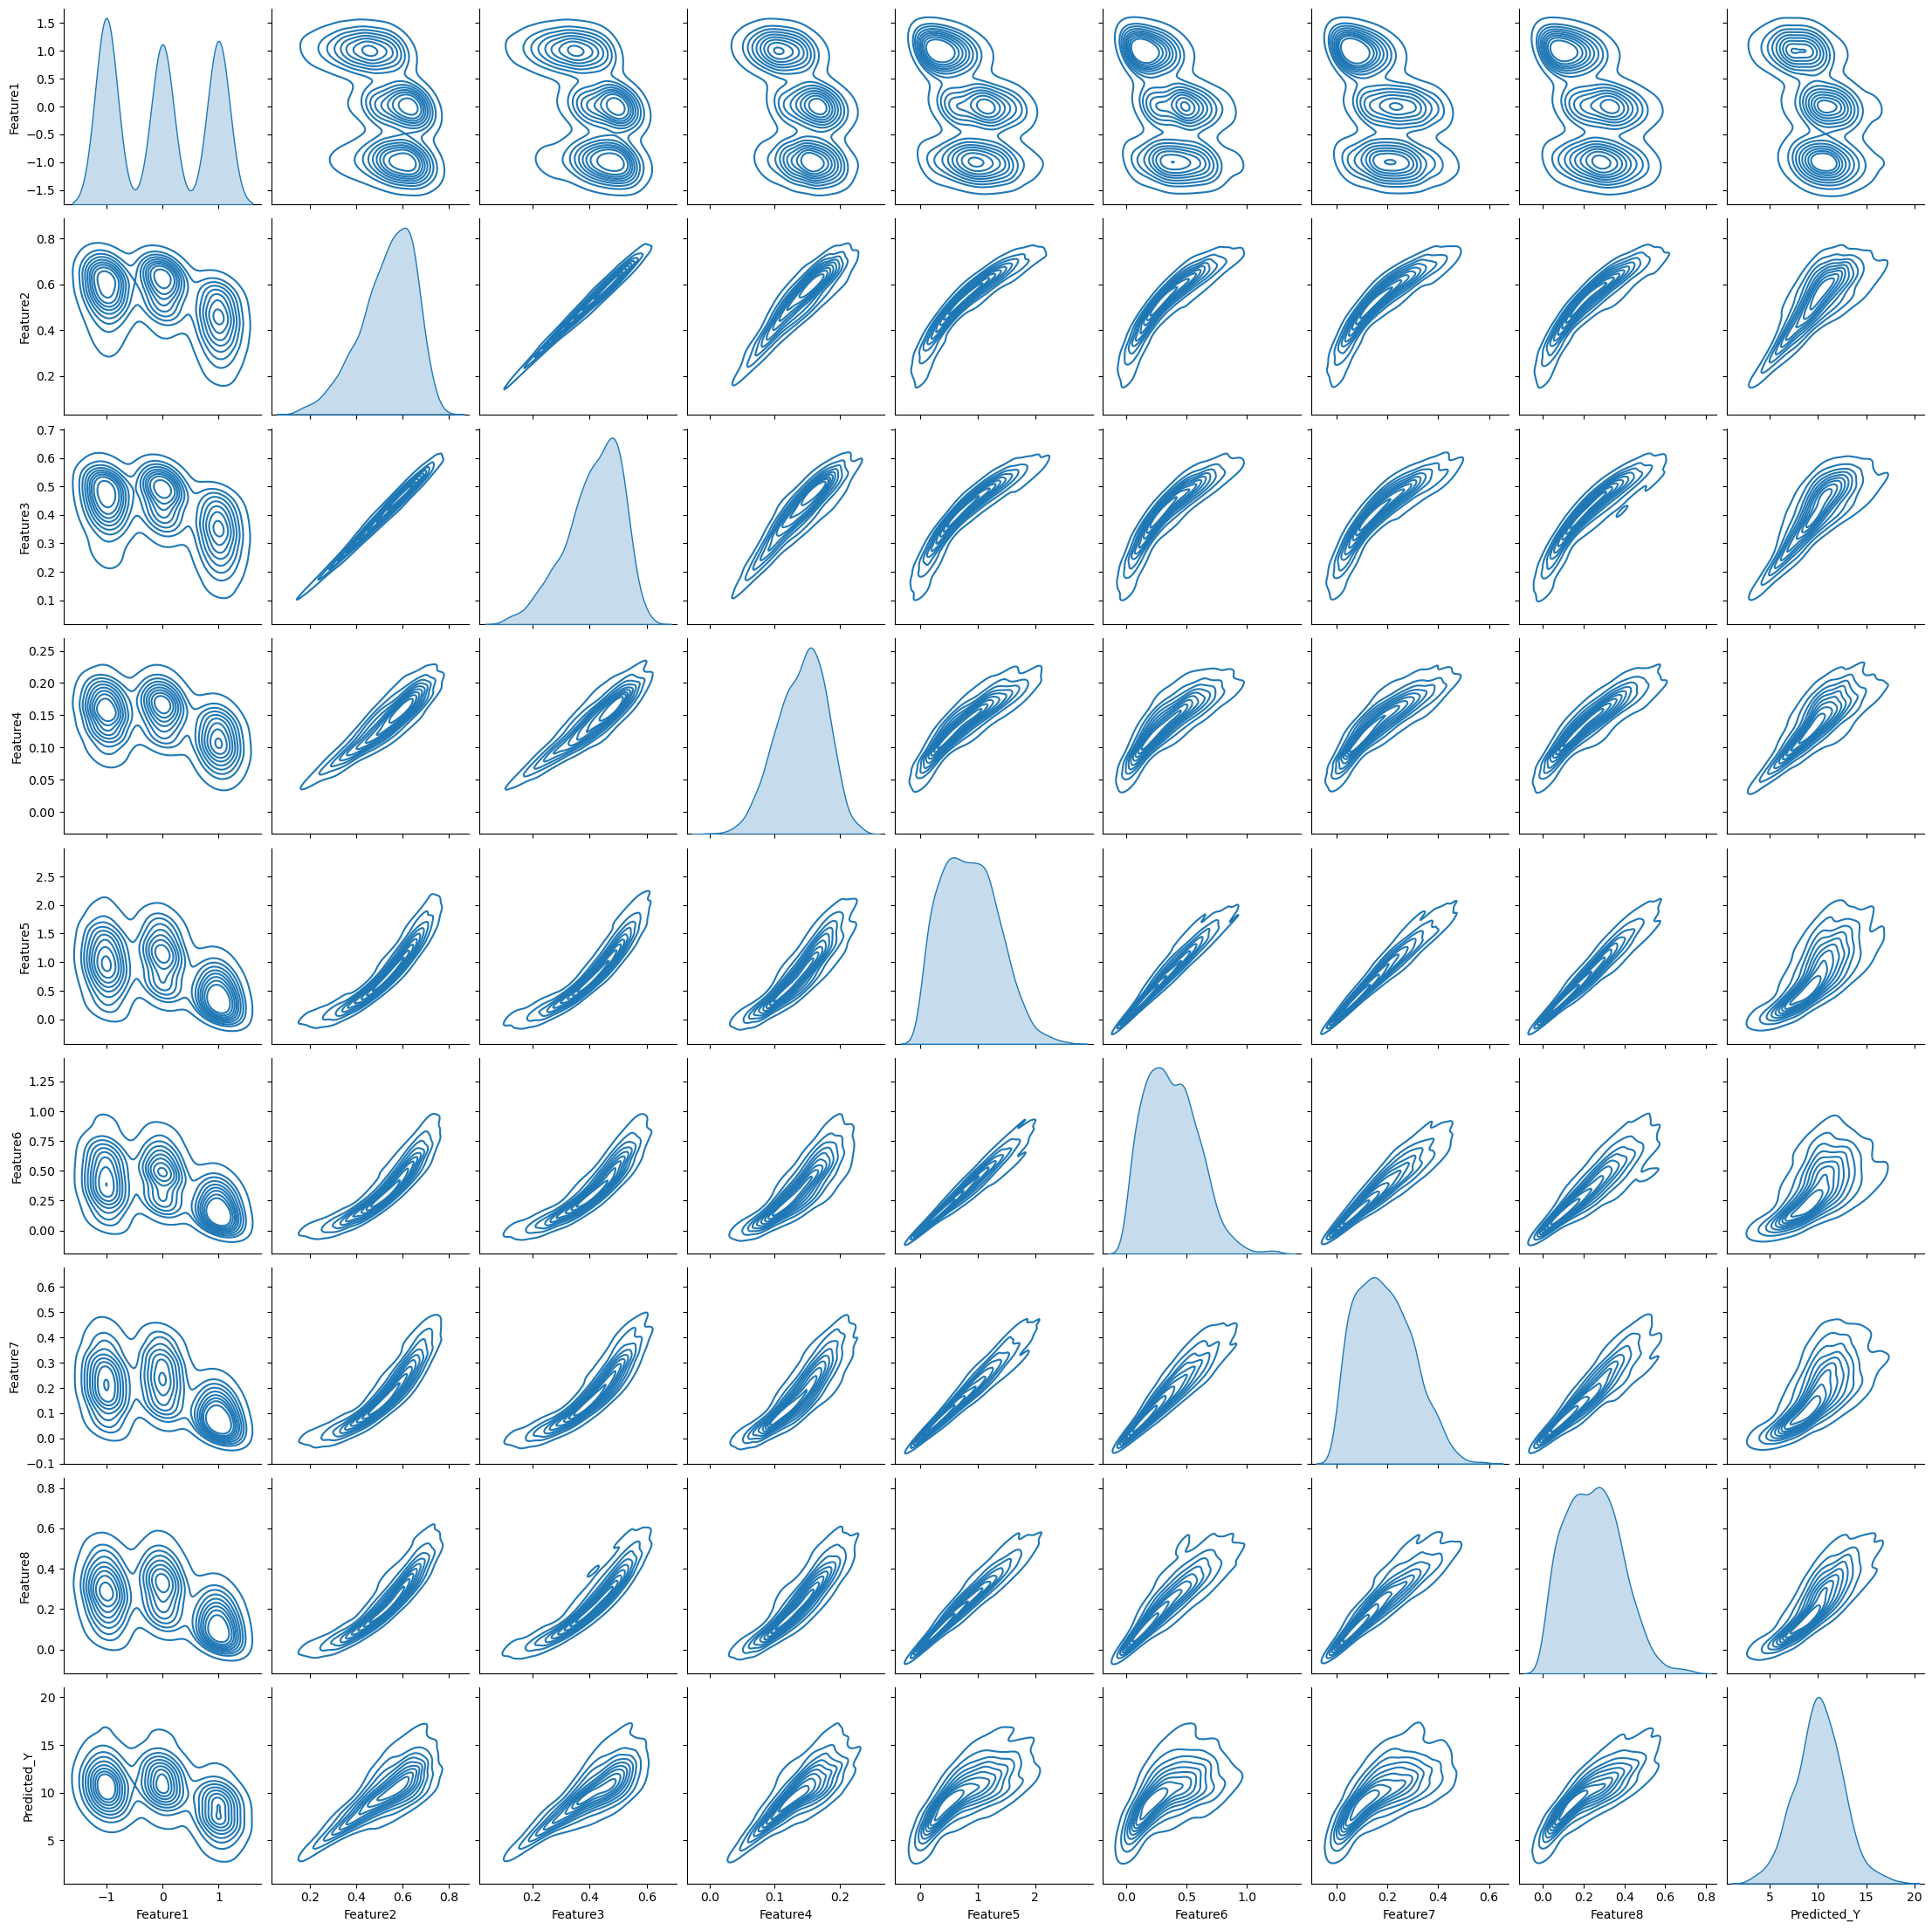

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.DataFrame(data=np.column_stack((xtest, yHat)), columns=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6', 'Feature7', 'Feature8', 'Predicted_Y'])

# 将预测的目标变量 yHat 添加到 DataFrame 中

# 使用 Seaborn 的 pairplot 函数来创建散点矩阵图
#sns.pairplot(df,markers=["o", "s", "D", "x", "P"])
sns.pairplot(df, kind="kde",markers=["o", "s", "D", "x", "P"])
plt.show()